In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s=Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=s)
driver.maximize_window()

source_url = "https://namu.wiki/w/%EB%A7%A8%EC%B2%B4%EC%8A%A4%ED%84%B0%20%EC%8B%9C%ED%8B%B0%20FC"

driver.get(source_url)
driver.implicitly_wait(10)

req = driver.page_source

soup = BeautifulSoup(req, "html.parser")
#print(soup.prettify())
contents_table = soup.find(name="table")
#print(contents_table)
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all("a")
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if "png" not in page_url:
            page_urls.append(page_url)

page_urls = list(set(page_urls))
for page in page_urls:
    print(page)

driver.close()



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [C:\Users\richk\.wdm\drivers\chromedriver\win32\98.0.4758.102\chromedriver.exe] found in cache


https://namu.wiki/w/%ED%8B%80:EFL%20%EC%B1%94%ED%94%BC%EC%96%B8%EC%8B%AD
https://namu.wiki/w/%EB%B8%8C%EB%9D%BC%EC%9D%B4%ED%8A%BC%20%EC%95%A4%20%ED%98%B8%EB%B8%8C%20%EC%95%8C%EB%B9%84%EC%98%A8%20FC
https://namu.wiki/w/%EB%A6%AC%EC%A6%88%20%EC%9C%A0%EB%82%98%EC%9D%B4%ED%8B%B0%EB%93%9C%20FC
https://namu.wiki/w/%ED%8B%80:%EC%84%B8%EA%B3%84%20%EC%B6%95%EA%B5%AC%20%EC%A3%BC%EC%9A%94%20%EB%A6%AC%EA%B7%B8%20%EB%B0%8F%20%EB%8C%80%ED%91%9C%ED%8C%80/%EB%91%98%EB%9F%AC%EB%B3%B4%EA%B8%B0%20%ED%8B%80
https://namu.wiki/w/%EC%9B%A8%EC%8A%A4%ED%8A%B8%ED%96%84%20%EC%9C%A0%EB%82%98%EC%9D%B4%ED%8B%B0%EB%93%9C%20FC
https://namu.wiki/w/%ED%8B%80:%ED%94%84%EB%A6%AC%EB%AF%B8%EC%96%B4%20%EB%A6%AC%EA%B7%B8
https://namu.wiki/w/%EB%85%B8%EB%A6%AC%EC%B9%98%20%EC%8B%9C%ED%8B%B0%20FC
https://namu.wiki/w/%EC%95%84%EC%8A%A4%ED%86%A4%20%EB%B9%8C%EB%9D%BC%20FC
https://namu.wiki/w/%ED%94%84%EB%A6%AC%EB%AF%B8%EC%96%B4%20%EB%A6%AC%EA%B7%B8


In [2]:
driver = webdriver.Chrome(service=s)
driver.maximize_window()

driver.get(page_urls[2])
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")
contents_table =  soup.find(name="article")

title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs = {"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "**<<</\/\/\/\>>>**".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus[:1000])

driver.close()

리즈 유나이티드 FC 


리즈 유나이티드 FC


   은(는) 여기로 연결됩니다. 2021-22 시즌에 대한 내용은 리즈 유나이티드 FC/2021-22 시즌 문서를의 번 문단을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 참고하십시오.**<<</\/\/\/\>>>**참가 클럽 (2021–22)**<<</\/\/\/\>>>** [ 펼치기 · 접기 ]노리치뉴캐슬레스터리버풀리즈맨시티맨유번리브라이튼 브렌트포드사우스햄튼아스날아스톤 빌라에버튼왓포드울버햄튼웨스트햄첼시토트넘팰리스 ▶ 프리미어 리그｜ 리그 1｜ 에레디비시 디비전 A｜ 프리미어십｜ 내셔널디비전 프리미어 디비전｜ 컴리 프리미어전세계 리그 및 대표팀 보기**<<</\/\/\/\>>>**노리치**<<</\/\/\/\>>>**뉴캐슬**<<</\/\/\/\>>>**레스터**<<</\/\/\/\>>>**리버풀**<<</\/\/\/\>>>**리즈**<<</\/\/\/\>>>**맨시티**<<</\/\/\/\>>>**맨유**<<</\/\/\/\>>>**번리**<<</\/\/\/\>>>**브라이튼**<<</\/\/\/\>>>** 브렌트포드**<<</\/\/\/\>>>**사우스햄튼**<<</\/\/\/\>>>**아스날**<<</\/\/\/\>>>**아스톤 빌라**<<</\/\/\/\>>>**에버튼**<<</\/\

In [3]:
"""Beautiful Soup을 이용한 위키피디아 웹 크롤링하기"""

source_url = "https://ko.wikipedia.org/wiki/%ED%8A%B9%EC%88%98:%EC%B5%9C%EA%B7%BC%EB%B0%94%EB%80%9C?hidebots=1&hidecategorization=1&hideWikibase=1&limit=50&days=7&urlversion=2"

driver = webdriver.Chrome(service=s)
driver.maximize_window()

driver.get(source_url)
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")
contents_table = soup.find(name="ul", class_="special")
contents_list = contents_table.find_all(name="span", attrs={"class":"mw-title"})

page_url_base = "https://ko.wikipedia.org/"
page_urls = []
for index in range(0, len(contents_list)):
    url = contents_list[index].find_all('a')
    if len(url) > 0:
        url_address = page_url_base + url[0].get('href')
        if 'png' not in url_address:
            page_urls.append(url_address)
            #print(url_address)
#print(contents_list)
page_urls = list(set(page_urls))
print(page_urls)
driver.close()

['https://ko.wikipedia.org//wiki/%EC%8B%A0%EC%97%B0%EC%8B%9D', 'https://ko.wikipedia.org//wiki/%EC%9C%88%EB%8F%84%EC%9A%B0_8.1', 'https://ko.wikipedia.org//wiki/%EA%B4%B4%EC%84%B8%EB%84%A8%EC%97%AD', 'https://ko.wikipedia.org//wiki/%EC%99%84%EB%B2%BD%ED%95%9C_%EB%B3%B5%EC%88%98', 'https://ko.wikipedia.org//wiki/%ED%8B%80:%EC%9D%98%EA%B2%AC_%EC%9A%94%EC%B2%AD_%EB%AA%A9%EB%A1%9D', 'https://ko.wikipedia.org//wiki/%EC%9C%88%EB%8F%84%EC%9A%B0_8', 'https://ko.wikipedia.org//wiki/%EA%B9%80%ED%95%9C%EB%B3%84', 'https://ko.wikipedia.org//wiki/%EC%9C%88%EB%8F%84%EC%9A%B0_XP', 'https://ko.wikipedia.org//wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:%EC%82%AC%EB%9E%91%EB%B0%A9/2022%EB%85%84_%EC%A0%9C3%EC%A3%BC', 'https://ko.wikipedia.org//wiki/%EB%A3%A8%EB%94%A9%EC%9D%B4', 'https://ko.wikipedia.org//wiki/%EC%9C%88%EB%8F%84%EC%9A%B0_98', 'https://ko.wikipedia.org//wiki/%EC%9C%88%EB%8F%84%EC%9A%B0_%EB%AF%B8', 'https://ko.wikipedia.org//wiki/%EC%9C%88%EB%8F%84%EC%9A%B0_%EB%B9%84%EC%8A%A4%ED%83%80', 'http

In [4]:
"""위키피디아의 최근 변경 데이터 크롤링"""

columns = ['title', 'category','content_text']
df = pd.DataFrame(columns = columns)


for page_url in page_urls:
    driver = webdriver.Chrome(service=s)
    driver.maximize_window()
    driver.get(page_url)
    req=driver.page_source
    soup = BeautifulSoup(req, "html.parser")
    contents_table = soup.find_all(name="p")
    del contents_table[0] #로그아웃한... 를 지워줌
    #print(contents_table)

    titles = soup.find_all(name="h1")[0]

    if soup.find(name="div", attrs={"id":"mw-normal-catlinks"}) is not None:
        if len(soup.find(name="div", attrs={"id":"mw-normal-catlinks"}))>0:
            category_html = soup.find(name="div", attrs={"id":"mw-normal-catlinks"})
            category = category_html.find_all(name="li")
        else:
            category = None
    else:
        category = None
    content_corpus_list=[]

    if titles is not None:
        row_title = titles.text.replace("\n", " ")
    else:
        row_title = ""

    if contents_table is not None:
        for paragraphs in contents_table:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n"," "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")

    row_category=[]
    if category is not None:
        for each_category in category:
            if each_category is not None:
                row_category.append(each_category.text.replace("\n", " "))
            else:
                row_category.append("")
    else:
        row_category.append("")

    row = [row_title, "/".join(row_category), "".join(content_corpus_list)]

    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)

    driver.close()

df.head()

,title,category,content_text
0,신연식,1976년 출생/살아있는 사람/대한민국의 영화 감독/대한민국의 영화 각본가/대한민국...,"신연식(1976년 ~ )은 대한민국의 영화 감독이자 각본가, 영화 프로듀서이다."
1,윈도우 8.1,윈도우 8/2013년 소프트웨어/마이크로소프트 윈도우/윈도우 NT/X86-64 운영...,윈도우 8.1(영어: Windows 8.1)은 마이크로소프트에서 윈도우 8을 보완해...
2,괴세넨역,우리주의 철도역/1882년 개업한 철도역/스위스연방철도의 철도역,괴세넨역(독일어: Göschenen)은 스위스 우리주와 괴세넨에 있는 기차역이다. ...
3,완벽한 복수,2022년 드라마/한국방송공사 2TV 일일연속극/복수를 소재로 한 드라마/대한민국의...,《완벽한 복수》는 한국방송공사 2TV 일일연속극이다. 오창석 : 김선호/고선수 역 ...
4,틀:의견 요청 목록,위키백과 틀,아래의 토론들은 여러 편집자의 참여와 관심을 필요로 하고 있습니다. 의견 요청 절차...


In [5]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') #한글의 정규표현식
    result = hangul.sub('', text)
    return result

print(text_cleaning(df['content_text'][0]))

신연식년  은 대한민국의 영화 감독이자 각본가 영화 프로듀서이다 


In [6]:
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head()

,title,category,content_text
0,신연식,년 출생살아있는 사람대한민국의 영화 감독대한민국의 영화 각본가대한민국의 남자 영화 ...,신연식년 은 대한민국의 영화 감독이자 각본가 영화 프로듀서이다
1,윈도우,윈도우 년 소프트웨어마이크로소프트 윈도우윈도우 운영 체제 운영 체제사유 운영 체제,윈도우 영어 은 마이크로소프트에서 윈도우 을 보완해서 출시한 운영체제이다 년 월 ...
2,괴세넨역,우리주의 철도역년 개업한 철도역스위스연방철도의 철도역,괴세넨역독일어 은 스위스 우리주와 괴세넨에 있는 기차역이다 고트하르트 터널의 북쪽 ...
3,완벽한 복수,년 드라마한국방송공사 일일연속극복수를 소재로 한 드라마대한민국의 로맨스 드라마가족...,완벽한 복수는 한국방송공사 일일연속극이다 오창석 김선호고선수 역 순수한 청년 주은...
4,틀의견 요청 목록,위키백과 틀,아래의 토론들은 여러 편집자의 참여와 관심을 필요로 하고 있습니다 의견 요청 절차에...


In [7]:
title_corpus = " ".join(df['title'].tolist())
category_corpus = " ".join(df['category'].tolist())
content_corpus = " ".join(df['content_text'].tolist())
print(title_corpus)

신연식 윈도우  괴세넨역 완벽한 복수 틀의견 요청 목록 윈도우  김한별 윈도우  위키백과사랑방년 제주 루딩이 윈도우  윈도우 미 윈도우 비스타 년 윈도우   트윈스 넝쿨째 굴러온 당신 머드 더 스튜던트 호랑이 들어와요 기나ㅏㄴ 년  리그 알 무타미드 리그  경기 일정 김한별 야구 선수 알 왈리드 세 팽배 틀 위즈 명단 급팽창 이론 김나연 배우 윈도우  제주 유나이티드  장즈중 뤄루이칭


In [8]:
from konlpy.tag import Okt
from collections import Counter

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count=Counter(nouns)
count

Counter({'연식': 1,
         '년': 408,
         '은': 77,
         '대한민국': 28,
         '영화': 3,
         '감독': 88,
         '이자': 11,
         '각본가': 1,
         '프로듀서': 1,
         '윈도우': 615,
         '영어': 14,
         '마이크로소프트': 111,
         '보완': 2,
         '출시': 80,
         '운영체제': 6,
         '월': 268,
         '일': 213,
         '운영': 37,
         '체제': 36,
         '첫': 19,
         '주요': 8,
         '업데이트': 58,
         '의': 103,
         '공식': 13,
         '베타': 10,
         '정식': 10,
         '판이': 3,
         '버전': 156,
         '이': 155,
         '데스크톱': 20,
         '인터페이스': 19,
         '제거': 15,
         '시작': 54,
         '버튼': 8,
         '포함': 58,
         '어댑터': 1,
         '리뷰': 4,
         '비평': 1,
         '몇': 5,
         '가지': 26,
         '부분': 16,
         '고려': 6,
         '것': 188,
         '측면': 2,
         '추가': 44,
         '개선': 20,
         '인터넷': 46,
         '익스플로러': 37,
         '로': 52,
         '마지막': 12,
         '플래시': 3,
         '드라이브': 7,
 

In [9]:
remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'윈도우': 615, '팽창': 231, '버전': 156, '우주': 136, '마이크로소프트': 111, '지원': 103, '시즌': 90, '비스타': 89, '감독': 88, '사용자': 81, '사용': 81, '출시': 80, '기능': 78, '문제': 72, '다른': 70, '서비스': 69, '종료': 64, '업데이트': 58, '포함': 58, '프로그램': 58, '대한': 55, '비트': 55, '때문': 55, '시작': 54, '이론': 53, '에디': 50, '모형': 49, '한국': 47, '인터넷': 46, '이후': 45, '추가': 44, '시리즈': 44, '리그': 44, '보안': 43, '초기': 43, '설치': 42, '일반': 41, '서버': 41, '시스템': 40, '에너지': 40, '운영': 37, '익스플로러': 37, '제공': 37, '체제': 36, '경우': 35, '지원이': 35, '이전': 33, '또한': 32, '컴퓨터': 32, '트윈스': 32, '모든': 31, '진출': 31, '플레이오프': 31, '발표': 30, '기본': 30, '프로': 30, '공간': 30, '경기': 30, '삼성': 30, '밀도': 30, '위해': 29, '미디어': 29, '업그레이드': 29, '투수': 29, '대한민국': 28, '개발': 28, '처음': 28, '대해': 27, '상태': 27, '답변': 27, '가지': 26, '당시': 26, '해결': 26, '일부': 26, '제안': 26, '다음': 25, '설명': 25, '한국어': 25, '가장': 25, '발생': 25, '파일': 24, '시간': 24, '다시': 24, '이름': 24, '이유': 24, '요구': 23, '이상': 23, '판매': 23, '매우': 23, '제품': 23, '복사': 23, '우승': 23, '우주론': 23, '확장': 22, '예측': 22, '

In [10]:
korean_stopwords_path = "C:/Users/richk/Desktop/python/python-data-analysis/data/korean_stopwords.txt"
with open(korean_stopwords_path, encoding = "UTF-8") as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [11]:
wikipedia_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장', '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', '이름', '년월']
for stopword in wikipedia_stopwords:
    stopwords.append(stopword)

remove_char_counter = Counter({x: remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'윈도우': 615, '팽창': 231, '버전': 156, '우주': 136, '마이크로소프트': 111, '지원': 103, '시즌': 90, '비스타': 89, '감독': 88, '사용자': 81, '출시': 80, '기능': 78, '문제': 72, '서비스': 69, '종료': 64, '업데이트': 58, '포함': 58, '프로그램': 58, '대한': 55, '비트': 55, '시작': 54, '이론': 53, '에디': 50, '모형': 49, '한국': 47, '인터넷': 46, '시리즈': 44, '리그': 44, '보안': 43, '초기': 43, '설치': 42, '일반': 41, '서버': 41, '시스템': 40, '에너지': 40, '운영': 37, '익스플로러': 37, '제공': 37, '체제': 36, '지원이': 35, '이전': 33, '컴퓨터': 32, '트윈스': 32, '진출': 31, '플레이오프': 31, '발표': 30, '기본': 30, '프로': 30, '공간': 30, '경기': 30, '삼성': 30, '밀도': 30, '위해': 29, '미디어': 29, '업그레이드': 29, '투수': 29, '대한민국': 28, '개발': 28, '처음': 28, '대해': 27, '상태': 27, '답변': 27, '가지': 26, '당시': 26, '해결': 26, '일부': 26, '제안': 26, '한국어': 25, '발생': 25, '파일': 24, '다시': 24, '이유': 24, '요구': 23, '판매': 23, '제품': 23, '복사': 23, '우승': 23, '우주론': 23, '확장': 22, '예측': 22, '현재': 22, '공개': 22, '최초': 22, '작업': 21, '동시': 21, '선수': 21, '기록': 21, '진공': 21, '데스크톱': 20, '개선': 20, '사항': 20, '기반': 20, '통해': 20, '토론': 20, '여러': 20,

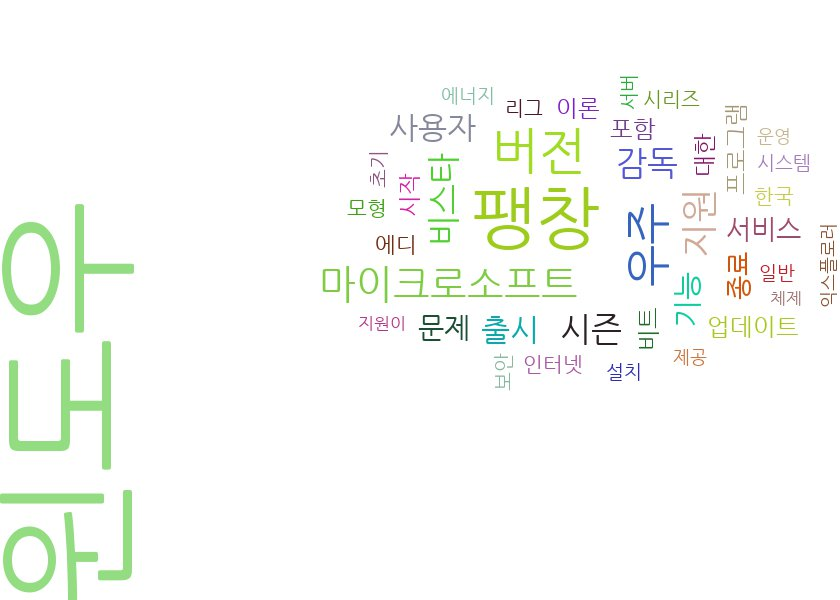

In [21]:
import random
import pytagcloud
import webbrowser

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize = 140)
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(1500, 600), fontname='NanumGothic', rectangular=False)

from IPython.display import Image
Image(filename = 'wordcloud.jpg')